<a href="https://colab.research.google.com/github/pablonicolasr/diplodatos-iaa-2022-grupo32/blob/Seba_IntroML/Grupo_32_IntroML_Lab_1_SGO_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [23]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [25]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**Respuestas Ejercicio 1**

1- El conjunto de datos contiene información sobre precios de casas en la ciudad de Boston y corresponde a la publicación científica de Harrison, D. y Rubinfeld, D.L. 'Los precios hedónicos y la demanda de aire limpio', publicado en J. Environ. Economics & Management, vol.5, 81-102, 1978.

2- La variable a predecir es el valor medio de una vivienda ocupada por su propietario. Como ya se cuenta en la base de datos con una columna que brinda información de valores de vivienda, se trata de un problema de Aprendizaje Supervisado. Específicamente esta variable en la base de datos se denomina "Valor medio de las viviendas ocupadas por sus propietarios". Está codificada como MEDV y las unidades se muestran en miles de dólares. Se cuenta con 506 registros para el modelado predictivo.

3- Los atributos disponibles para hacer la predicción son 13 variables relacionadas a la valorización del "aire limpio". Sin embargo, no todas las variables reportan datos literalmente asociados a la polución del aire. Las variables son:

 *   CRIM     Tasa de criminalidad per cápita por ciudad. Dado que CRIM mide la amenaza al bienestar que perciben los hogares en varios vecindarios del área metropolitana de Boston (suponiendo que las tasas de delincuencia son generalmente proporcionales a la percepción de peligro de las personas), debería tener un efecto negativo en el valor de la vivienda.

 *   ZN       Proporción de la tierra residencial de una ciudad zonificada para lotes de más de 25000 pies cuadrados. Dado que dicha zonificación restringe la construcción de casas en lotes pequeños, se espera que ZN esté positivamente relacionado con los valores de la vivienda. También puede surgir un coeficiente positivo porque la zonificación representa la exclusividad, la clase social y las comodidades al aire libre de una comunidad.

 * INDUS    Proporción de acres comerciales no minoristas por ciudad. INDUS sirve como indicador de las externalidades asociadas con el ruido de la industria, el tráfico intenso y los efectos visuales desagradables y, por lo tanto, debería afectar negativamente el valor de la vivienda.

 * CHAS     Variable ficticia de Charles River (Es igual a 1 si el tramo limita con el río; 0 en caso contrario). CHAS capta las comodidades de una ubicación junto al río y, por lo tanto, el coeficiente debe ser positivo.

 * NOX      Concentración de óxidos nítricos (partes por 10 millones).

 * RM       Promedio de cuartos por vivienda. RM representa amplitud, por lo que debe estar relacionado positivamente con la vivienda.
 
 * AGE      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940. La antiguedad de la construcción generalmente está relacionada con la calidad de la estructura.

 * DIS      Distancias ponderadas a cinco centros de empleo de Boston. De acuerdo con las teorías tradicionales de los gradientes de renta de la tierra urbana, el valor de la vivienda debería ser más alto cerca de los niveles de empleo. DIS se ingresa en forma de logaritmo; el signo esperado es negativo.

 * RAD      Índice de accesibilidad a carreteras radiales. El índice de acceso a las carreteras se calculó por ciudad. Se necesitan buenas variables de acceso a las carreteras para que las variables de contaminación por automóviles no capturen las ventajas de ubicación de las carreteras. RAD captura otros tipos de ventajas de ubicación además de la cercanía al lugar de trabajo. Está en forma logarítmica El signo esperado es positivo.

 * TAX      Tasa de impuesto a la propiedad de valor total por cada 10000 dólares. Mide el costo de los servicios públicos en cada comunidad. Las tasas impositivas nominales fueron corregidas por índices de tasación local para producir la tasa impositiva de valor total para cada ciudad. El coeficiente de esta variable debe ser negativo.

 * PTRATIO  Relación alumno-docente por ciudad. Mide los beneficios del sector público en cada localidad. La relación de la proporción de alumnos por maestro con la calidad de la escuela no está del todo clara, aunque una proporción baja debería implicar que cada estudiante recibe una atención más individual. Se espera que el signo de PTRATIO sea negativo.

 * B        1000(Bk - 0.63)^2 donde Bk es la proporción de personas de tez negra por ciudad. En niveles bajos a moderados de B, un aumento en B debería tener una infiuencia negativa en el valor de la vivienda si los blancos consideran a los negros como vecinos indeseables. Sin embargo, la discriminación del mercado muestra que el valor de la vivienda es más alto a niveles muy altos de B. Uno espera, por lo tanto, una relación parabólica entre la proporción de negros en un vecindario y el valor de la vivienda.

 * LSTAT    Proporción de la población que tiene el estatus más bajo
(proporción de adultos sin educación secundaria completa
y proporción de trabajadores varones clasificados como
obreros). La especificación logarítmica implica que las distinciones de estatus socioeconómico significan más en los segmentos superiores de la sociedad que en las clases inferiores.

4 - Especulamos que las variables que pueden tener mayor capacidad predictiva son DIS, CRIM y RM. Se espera que a mayor DIS y RM se incremente el valor de las propiedades, mientras que a mayor CRIM se espera que disminuya el valor de las propiedades. Cabe destacar, que estamos especulando bajo un prisma sesgado por nuestro background cultural que puede diferir fuertemente con las predilecciones de los habitantes de Boston. A priori, todos los atributos presentados muestran una lógica razonable por la cual ninguno es desechable de antemano, salvo por los dilemas éticos que algunos presentan. 

5- El primer problema del conjunto de datos es que es muy pequeño. Dada la población de Boston en los 70s (≈3,2 millones de habitantes), la predicción prevista con 506 registros es muy poco robusta. Otro problema es que muchas de las variables consideradas están determinadas con datos del censo del año 1970 y pueden estar desactualizadas al momento de realizar análisis predictivos. En cuanto a los dilemas éticos está claramente relacionado al atributo B. Este atributo considera que la presencia de personas de tez negra puede influir negativamente en la valuación de las propiedades, lo cual resulta gravemente ofensivo y discriminatorio. Otro atributo éticamente desechable es LSTAT, que considera la proporción de la población con bajos niveles educativos o personas empleadas como obreros, como un indicador negativo en la valuación de las propiedades.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [26]:
boston['feature_names'].shape

(13,)

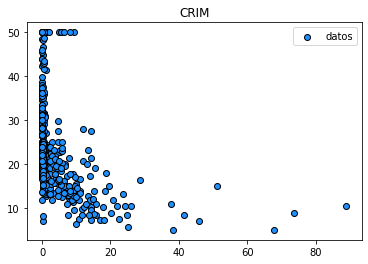

In [27]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.legend()
plt.show()

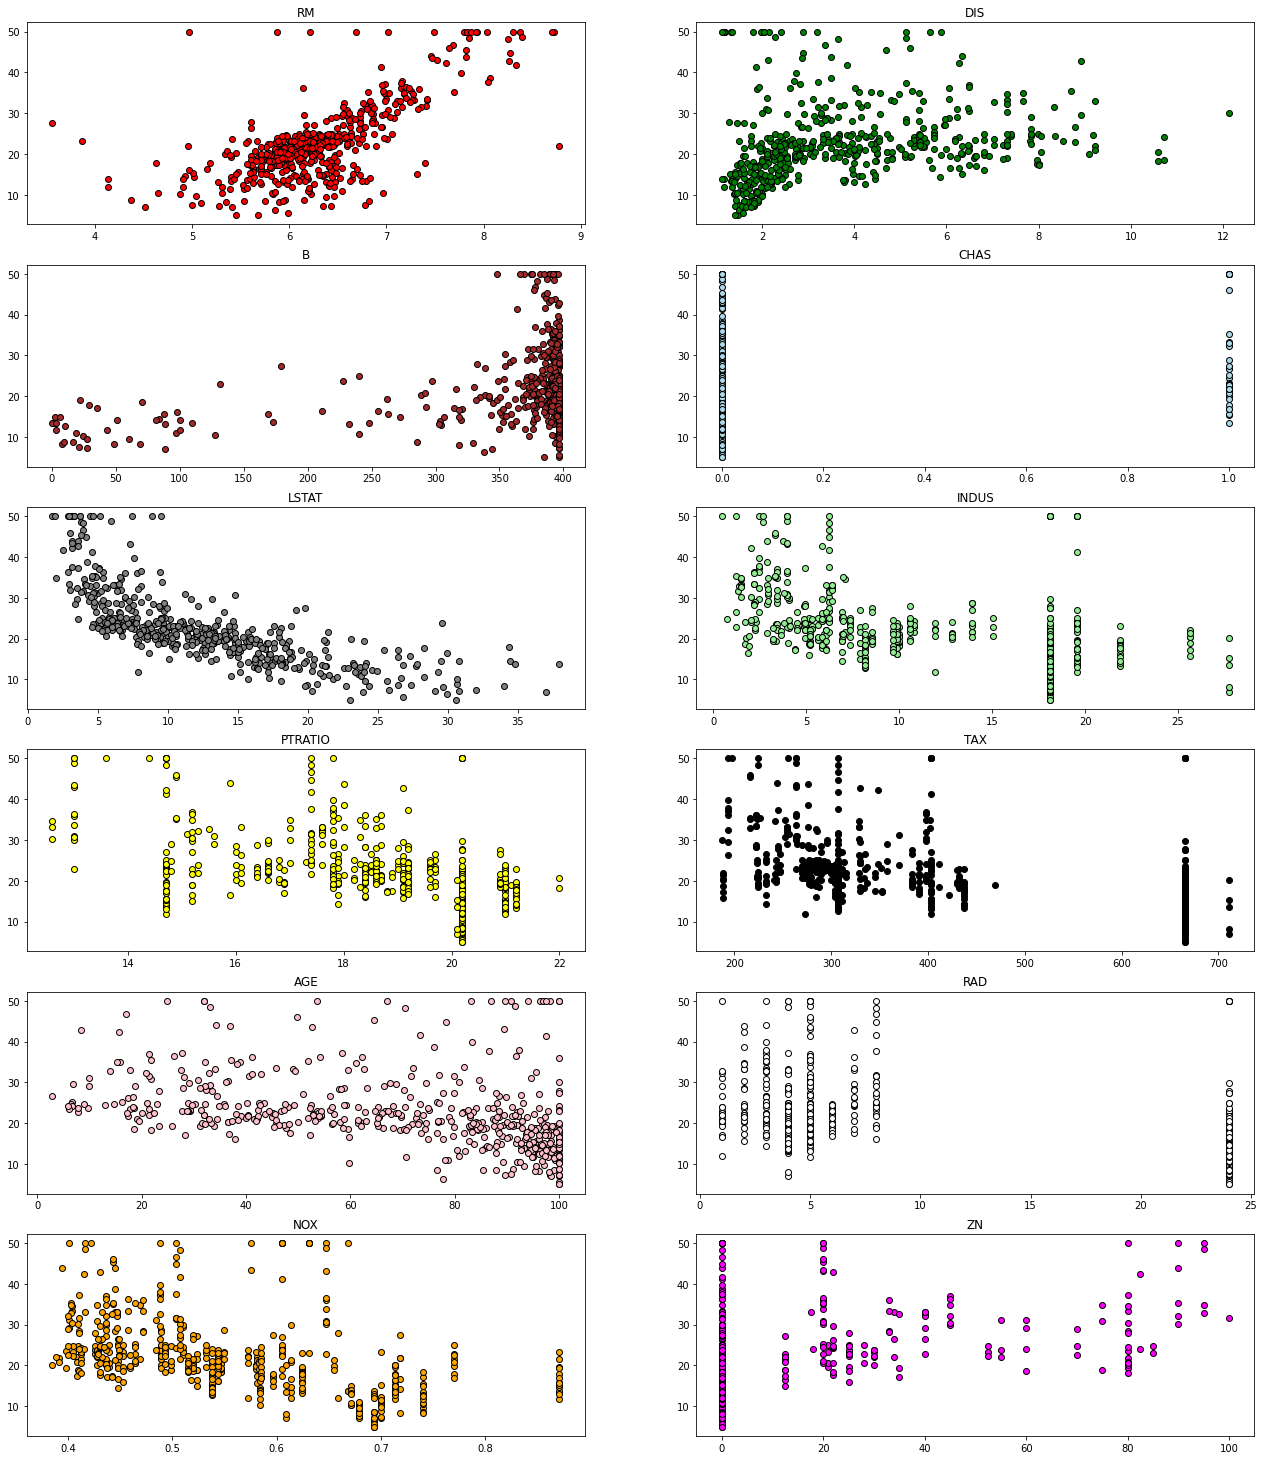

In [28]:
fig, ax= plt.subplots(nrows=6, ncols=2, figsize=(22,26))
RM = (boston['feature_names'] == 'RM')
ax[0,0].scatter(X[:, RM], y, facecolor="red", edgecolor="k")
ax[0,0].set_title('RM')
DIS = (boston['feature_names'] == 'DIS')
ax[0,1].scatter(X[:, DIS], y, facecolor="green", edgecolor="k")
ax[0,1].set_title('DIS')
B = (boston['feature_names'] == 'B')
ax[1,0].scatter(X[:, B], y, facecolor="brown", edgecolor="k")
ax[1,0].set_title('B')
CHAS = (boston['feature_names'] == 'CHAS')
ax[1,1].scatter(X[:, CHAS], y, facecolor="lightblue", edgecolor="k")
ax[1,1].set_title('CHAS')
LSTAT = (boston['feature_names'] == 'LSTAT')
ax[2,0].scatter(X[:, LSTAT], y, facecolor="grey", edgecolor="k")
ax[2,0].set_title('LSTAT')
INDUS = (boston['feature_names'] == 'INDUS')
ax[2,1].scatter(X[:, INDUS], y, facecolor="lightgreen", edgecolor="k")
ax[2,1].set_title('INDUS')
PTRATIO = (boston['feature_names'] == 'PTRATIO')
ax[3,0].scatter(X[:, PTRATIO], y, facecolor="yellow", edgecolor="k")
ax[3,0].set_title('PTRATIO')
TAX = (boston['feature_names'] == 'TAX')
ax[3,1].scatter(X[:, TAX], y, facecolor="black", edgecolor="k")
ax[3,1].set_title('TAX')
AGE = (boston['feature_names'] == 'AGE')
ax[4,0].scatter(X[:, AGE], y, facecolor="pink", edgecolor="k")
ax[4,0].set_title('AGE')
RAD = (boston['feature_names'] == 'RAD')
ax[4,1].scatter(X[:, RAD], y, facecolor="white", edgecolor="k")
ax[4,1].set_title('RAD')
NOX = (boston['feature_names'] == 'NOX')
ax[5,0].scatter(X[:, NOX], y, facecolor="orange", edgecolor="k")
ax[5,0].set_title('NOX')
ZN = (boston['feature_names'] == 'ZN')
ax[5,1].scatter(X[:, ZN], y, facecolor="magenta", edgecolor="k")
ax[5,1].set_title('ZN')
plt.show()

3- Evaluando "a ojo" los atributos, pareciera que LSTAT, PTRATIO y RM son los que condicionan en forma mas consistente los valores de y (valor de las casas).

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [29]:
# 1. Selecciono el atributo LSTAT
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [30]:
# 2. Instanciar y entrenar acá. ¿Entrenar es sinónimo de ajustar regresión?
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train_f, y_train)

LinearRegression()

In [31]:
# 3. Predecir y evaluar acá.
y_train_pred = reg.predict(X_train_f)
y_test_pred = reg.predict(X_test_f)

from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error}')
print(f'Test error: {test_error}')

Train error: 36.52396640695966
Test error: 46.336305360025925


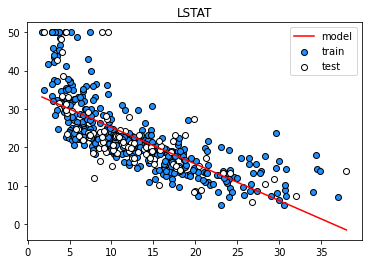

In [32]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, reg.predict(x), color="red", label="model")
plt.title(feature)
plt.legend()
plt.show()

5- El modelo bajo los datos de evalución mostró un error cuadrático medio 27% más alto que el error bajo datos de entrenamiento (46,3 vs 36,5). Esta es una performance satisfactoria considerando que se ha aplicado una regresión lineal. No obstante, puede ser interesante probar una regresión polinomial bajo diferentes grados de poinomio a fin de encontrar mejor capacidad de generalización del modelo. Dicho de otro modo, disminuir la brecha entre los valores de error obtenidos para datos de entrenamiento y evaluación. Por otro lado, para analizar la capacidad predictiva de LSTAT sería necesario evaluar bajo regresión lineal otros atributos y comparar los valores absolutos obtenidos del error.  

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [33]:
# Primero verifico que los vectores tengan 2 dimensiones.
X_train_f.shape, X_test_f.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404,), (102,))

In [34]:
# 1. Desarrollamos las 3 consignas del punto 1 en un bucle for. Solo dejamos aparte la impresión de valores
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # Entrenamos el modelo con los datos de LSTAT (X_train_f):
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False) # ¿Para qué se pone fit_intercept=False?
    polmodel = make_pipeline(pf, lr)
    polmodel.fit(X_train_f, y_train)
    
    # Elaboramos la predicción:
    y_train_pred = polmodel.predict(X_train_f)
    y_test_pred = polmodel.predict(X_test_f)
    
    # Evaluamos el error del modelo sobre ambos datasets:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Guardamos los errores obtenidos en una lista:
    train_errors.append(train_error) 
    test_errors.append(test_error) 

# Imprimimos los errores calculados
print(f'Train errors: {train_errors}')
print(f'Test errors: {test_errors}')

Train errors: [85.1437202235075, 36.52396640695966, 28.18917233416823, 26.78484649674975, 25.84943285886594, 25.034962537749603, 25.014028004243542, 25.01353497094333, 24.84582298356287, 24.825939935649917]
Test errors: [81.58231743908232, 46.336305360025946, 38.8468686617073, 37.224242268440385, 34.70486859830834, 34.834708181336396, 34.32620655264876, 34.26108257555098, 36.41528535962148, 34.91600456401141]


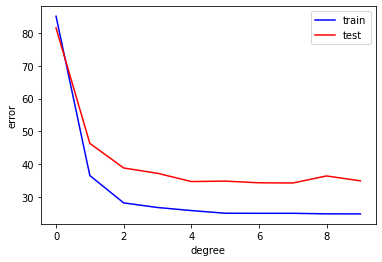

In [35]:
# 2. Graficamos las curvas de error en términos del grado del polinomio.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

3- Se observa que el error en entrenamiento siempre baja, mientras que el error de evaluación baja hasta el polinomio grado 7. En grado 8 se observa un leve sobreajuste y luego mejora nuevamente el ajuste en el polinomio de grado 9. Considerando las magnitudes de los valores de error, nos quedamos con el modelo que utiliza el polinomio de grado 7.

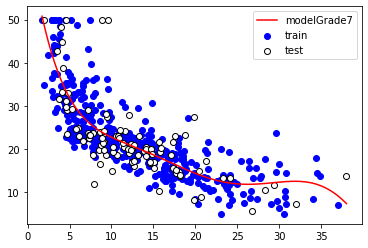

In [36]:
# 4. Reconstruimos el mejor modelo y graficamos
degree = 7
modelGrade7 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
modelGrade7.fit(X_train_f, y_train)

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, modelGrade7.predict(x), color="red", label="modelGrade7")
plt.legend()
plt.show()

5- El modelo elegido tiene un 36% mas de error sobre los datos de testeo que sobre los de entrenamiento, lo que indica alguna dificultad en su capacidad de generalización. Sin embargo, la magnitud del error se sitúa por debajo del valor 35; el cual fue indicado en la consigna como un valor muy bueno. Por otra parte, cabe destacar que si bien el modelo de grado 7 es el que posee menor magnitud de error antes de comenzar el sobreajuste, sería importante considerar el modelo de grado 4 que tiene una magnitud de error muy similar y mucha menor complejidad.  

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [37]:
# 1. Selecciono los atributos LSTAT y RM:
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape, y_train.shape, y_test.shape

((404, 2), (102, 2), (404,), (102,))

In [38]:
# 2. Repetimos el proceso de modelado con 2 atributos.
train_errors2at = []
test_errors2at = []
degrees = [1, 2, 3, 4, 5] # Acortamos la lista de degrees a solo 5 porque con más empieza a tardar mucho o agota RAM. Además, sacamos el 0 porque saltaba error
for degree in degrees:
    # Entrenamos el modelo con los datos de LSTAT y RM:
    pf = PolynomialFeatures(degree)
    poly_x_train_fs = pf.fit_transform(X_train_fs) # fit_transform estandariza los datos para que todos los atributos tengan una escala común (media=0, varianza=1)
    poly_x_test_fs = pf.transform(X_test_fs)# transform() escala los datos de la misma manera que fit_transform() pero evitando que sean usados para ajustar el modelo.
    lr = LinearRegression(fit_intercept=False)
    model2at = make_pipeline(pf, lr)
    model2at.fit(poly_x_train_fs, y_train)
    
    # Elaboramos la predicción:
    y_train_pred = model2at.predict(poly_x_train_fs)
    y_test_pred = model2at.predict(poly_x_test_fs)
        
    # Evaluamos el error del modelo sobre ambos datasets:
    train_error2at = mean_squared_error(y_train, y_train_pred)
    test_error2at = mean_squared_error(y_test, y_test_pred)
    
    # Guardamos los errores obtenidos en una lista:
    train_errors2at.append(train_error2at) 
    test_errors2at.append(test_error2at)

print(train_errors2at)
print(test_errors2at)  

[28.79027648205344, 14.188503706315265, 11.62820880384721, 22.542530879409618, 1386.7639370859665]
[37.383105638779966, 33.99923337121684, 2308.2428985260985, 33600166.599932194, 597987088104.3019]


Al evaluar el modelado con dos atributos se observa que el aumento en los grados del polinomio solo mejora la capacidad predictiva hasta el grado 2. Luego, el error se dispara en forma ascendente. El nivel de error logrado en grado 2 (33,99), es apenas mejor que el logrado con un solo atributo (34,26). Considerando esto, nos quedaríamos con el modelo de un atributo que posee menor complejidad. No obstante, podría ser interesante evaluar otros atributos y combinaciones de estos a fin de encontrar un mejor modelo.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [39]:
train_errorsALL = []
test_errorsALL = []
degrees = [1, 2]
for degree in degrees:
    # Entrenamos el modelo con los datos de todos los atributos:
    pf = PolynomialFeatures(degree)
    All_x_train = pf.fit_transform(X_train)
    All_x_test = pf.fit_transform(X_test)
    lr = LinearRegression(fit_intercept=False)
    modelALL = make_pipeline(pf, lr)
    modelALL.fit(All_x_train, y_train)
    
    # Elaboramos la predicción:
    y_train_pred = modelALL.predict(All_x_train)
    y_test_pred = modelALL.predict(All_x_test)
    
    # Evaluamos el error del modelo sobre ambos datasets:
    train_errorALL = mean_squared_error(y_train, y_train_pred)
    test_errorALL = mean_squared_error(y_test, y_test_pred)
    
    # Guardamos los errores obtenidos en una lista:
    train_errorsALL.append(train_errorALL) 
    test_errorsALL.append(test_errorALL)

print(train_errorsALL)
print(test_errorsALL)

[19.326470203585725, 4.6652013274275053e-20]
[33.44897999767987, 815193.7104325648]


Al incluir todos los atributos, solo es posible evaluar dos grados de polinomio ya que luego colab acusa un error relacionado a la falta de RAM. Esto posiblemente esté relacionado a que el error del modelo se dispara hacia arriba al aumentar los grados de polinomio. 
En cuanto al valor obtenido en grado 1 (33,44), se trata del menor obtenido hasta el momento. Habría que analizar su conveniencia dada la alta complejidad que tiene el modelo con 13 atributos. 

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [103]:
# En lugar de probar directamente diferentes alpha, ejecutamos el siguiente código para determinar el alpha óptimo. 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge() # normalize=True??? este argumento se usa cuando las variables no tienen la misma escala pero dice que está deprecado
parameters={'alpha':[1e-200, 1e-100,1e-20,1e-10,1,10,500,1000]}
grid = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
# Se considera el set de datos para el modelo con un solo atributo (LSTAT)
grid.fit(X_train_f,y_train)
print(grid.best_params_)
# Convert the results of CV into a dataframe
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score')

{'alpha': 10}


,params,mean_test_score,rank_test_score
5,{'alpha': 10},-36.887888,1
4,{'alpha': 1},-36.888168,2
3,{'alpha': 1e-10},-36.888201,3
0,{'alpha': 1e-200},-36.888201,4
1,{'alpha': 1e-100},-36.888201,4
2,{'alpha': 1e-20},-36.888201,4
6,{'alpha': 500},-36.912454,7
7,{'alpha': 1000},-37.009328,8


Train errors: [85.1437202235075, 36.52397694445635, 28.190046044650902, 26.8017065580058, 26.03122834535336, 25.941186174987013, 25.709230438051225, 25.2560769168352, 24.86119044727983, 24.883701145341494]
Test errors: [81.58231743908229, 46.33483557426346, 38.82794756195989, 37.19182602583146, 35.3322218057456, 35.29866108691919, 37.67657569023823, 34.34521674568655, 35.77361875669781, 37.3329477920013]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.98773e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.109e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.50373e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.10337e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


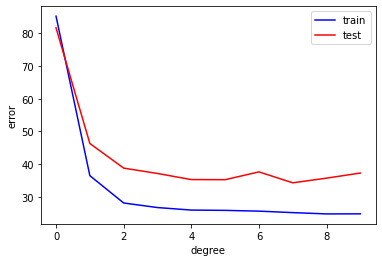

In [104]:
# Ahora corremos el modelo Ridge con diferentes grados de polinomio y un alpha óptimo=10 
from sklearn.linear_model import Ridge
train_errorsR = []
test_errorsR = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Ridge = Ridge(alpha=10)
for degree in degrees:
    # Entrenamos el modelo con los datos de LSTAT (X_train_f):
    pf = PolynomialFeatures(degree)
    Ridgemodel = make_pipeline(pf, Ridge)
    Ridgemodel.fit(X_train_f, y_train)
        
    # Elaboramos la predicción:
    y_train_pred = Ridgemodel.predict(X_train_f)
    y_test_pred = Ridgemodel.predict(X_test_f)
    
    # Evaluamos el error del modelo sobre ambos datasets:
    train_errorR = mean_squared_error(y_train, y_train_pred)
    test_errorR = mean_squared_error(y_test, y_test_pred)
    
    # Guardamos los errores obtenidos en una lista:
    train_errorsR.append(train_errorR) 
    test_errorsR.append(test_errorR) 

# Imprimimos los errores calculados
print(f'Train errors: {train_errorsR}')
print(f'Test errors: {test_errorsR}')

plt.plot(degrees, train_errorsR, color="blue", label="train")
plt.plot(degrees, test_errorsR, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

El uso de la regresión Ridge bajo el alpha óptimo calculado y varios grados de polinomios distintos, no arrojó mejores performances que lo calculado anteriormente con la Regresión Lineal. 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.98773e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.50394e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.65758e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.0254e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Train errors: [85.1437202235075, 36.62026061327218, 31.48749295135718, 32.142963620529315, 29.87334482941004, 28.172322127499527, 26.540337835213418, 26.824741994118803, 26.633179995742875, 25.385957488698093]
Test errors: [81.58231743908229, 46.27110144177039, 41.16806915762318, 43.11914490222438, 42.24166788191118, 38.12872574509737, 37.3899767924726, 39.358538263150166, 36.302837634209716, 42.58497986410725]


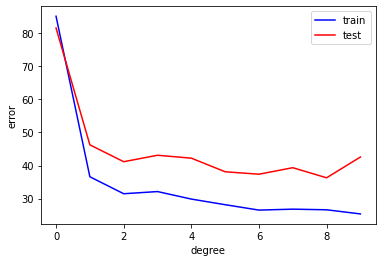

In [105]:
# Corremos otro modelo Ridge con diferentes grados de polinomio pero con un alpha no óptimo = 1000
from sklearn.linear_model import Ridge
train_errorsR = []
test_errorsR = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Ridge = Ridge(alpha=1000)
for degree in degrees:
    # Entrenamos el modelo con los datos de LSTAT (X_train_f):
    pf = PolynomialFeatures(degree)
    Ridgemodel = make_pipeline(pf, Ridge)
    Ridgemodel.fit(X_train_f, y_train)
        
    # Elaboramos la predicción:
    y_train_pred = Ridgemodel.predict(X_train_f)
    y_test_pred = Ridgemodel.predict(X_test_f)
    
    # Evaluamos el error del modelo sobre ambos datasets:
    train_errorR = mean_squared_error(y_train, y_train_pred)
    test_errorR = mean_squared_error(y_test, y_test_pred)
    
    # Guardamos los errores obtenidos en una lista:
    train_errorsR.append(train_errorR) 
    test_errorsR.append(test_errorR) 

# Imprimimos los errores calculados
print(f'Train errors: {train_errorsR}')
print(f'Test errors: {test_errorsR}')

plt.plot(degrees, train_errorsR, color="blue", label="train")
plt.plot(degrees, test_errorsR, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Observamos que el uso de un alpha no óptimo no influye demasiado en la performance del modelo.